# Import Libraries

In [64]:
import os
import re
import cv2
import pickle
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Visualize Data

In [65]:
animals_dir = '/Users/hongthai/Downloads/animals'
train_dir = os.path.join(animals_dir, 'train')
val_dir = os.path.join(animals_dir, 'val')

Number of training samples: 13474
Number of validation samples: 1497


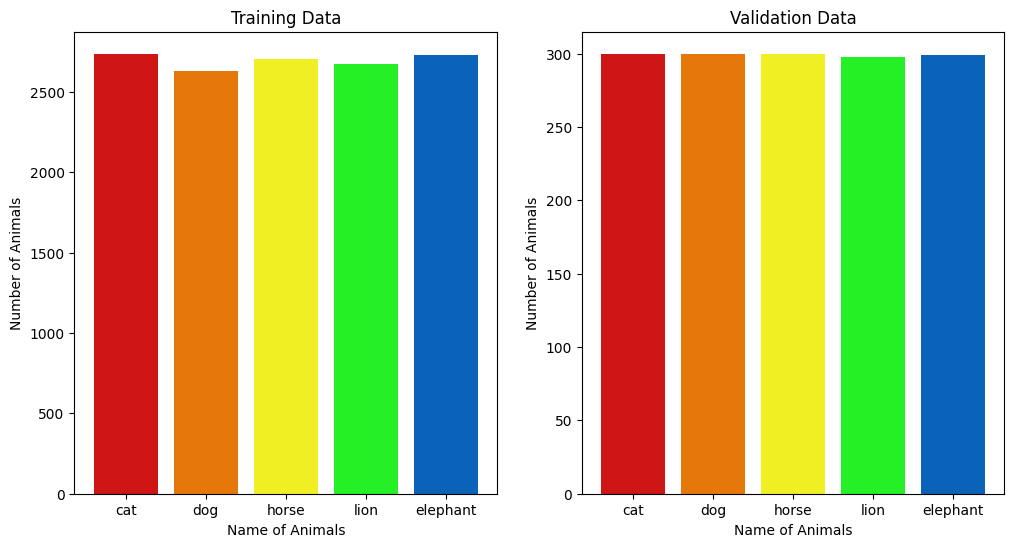

In [66]:
folders_train = []
file_counts_train = []
folders_val = []
file_counts_val = []

num_train = 0
num_val = 0

# Get statistics for training data
for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    if os.path.isdir(folder_path):
        folders_train.append(folder)
        file_counts_train.append(len(os.listdir(folder_path)))
        num_train += len(os.listdir(folder_path))

# Get statistics for validation data
for folder in os.listdir(val_dir):
    folder_path = os.path.join(val_dir, folder)
    if os.path.isdir(folder_path):
        folders_val.append(folder)
        file_counts_val.append(len(os.listdir(folder_path)))
        num_val += len(os.listdir(folder_path))

print('Number of training samples:', num_train)
print('Number of validation samples:', num_val)

colors = ["#D01515", "#E6780B", "#EFEF23", "#25EF25", "#0B62B9"]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
color1 = "#00CCCC"
color2 = "#FF9999"

# Plot bar chart for training data
ax1.bar(folders_train, file_counts_train, color=colors)
ax1.set_xlabel('Name of Animals')
ax1.set_ylabel('Number of Animals')
ax1.set_title('Training Data')

# Plot bar chart for validation data
ax2.bar(folders_val, file_counts_val, color=colors)
ax2.set_xlabel('Name of Animals')
ax2.set_ylabel('Number of Animals')
ax2.set_title('Validation Data')
plt.show()


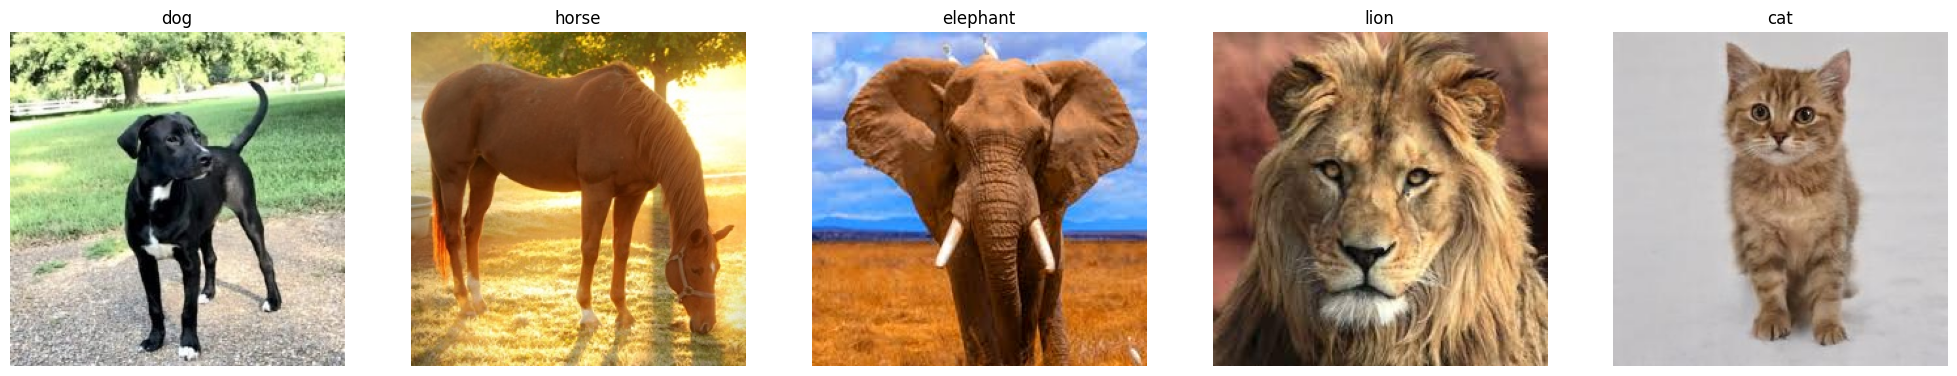

In [67]:
i = 1
plt.figure(figsize=(25, 10))

for img in os.listdir("/Users/hongthai/Downloads/animals/inf"):
    img_path = os.path.join("/Users/hongthai/Downloads/animals/inf", img)
    image = cv2.imread(img_path)

    plt.subplot(1, 5, i)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(img.split(".")[0])
    plt.axis("off")
    i += 1
plt.show()

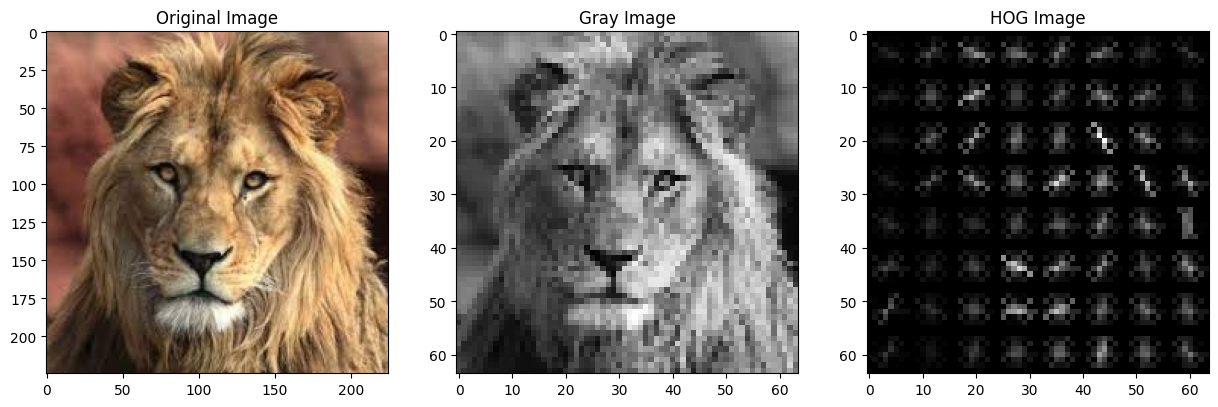

In [68]:
img_path = "/Users/hongthai/Downloads/animals/inf/lion.jpg"
image = cv2.imread(img_path)
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

image = cv2.imread(img_path)
image = np.array(image).astype('uint8')
image = cv2.resize(image, (64, 64))
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 3, 2)
plt.imshow(grey_image, cmap='gray')
plt.title('Gray Image')

sample_image_features, sample_hog_image = hog(grey_image,
                                              visualize=True,
                                              orientations=9,
                                              block_norm='L2',
                                              pixels_per_cell=(8, 8),
                                              cells_per_block=(2, 2))
plt.subplot(1, 3, 3)
plt.imshow(sample_hog_image, cmap=plt.cm.gray)
plt.title('HOG Image')

plt.show()

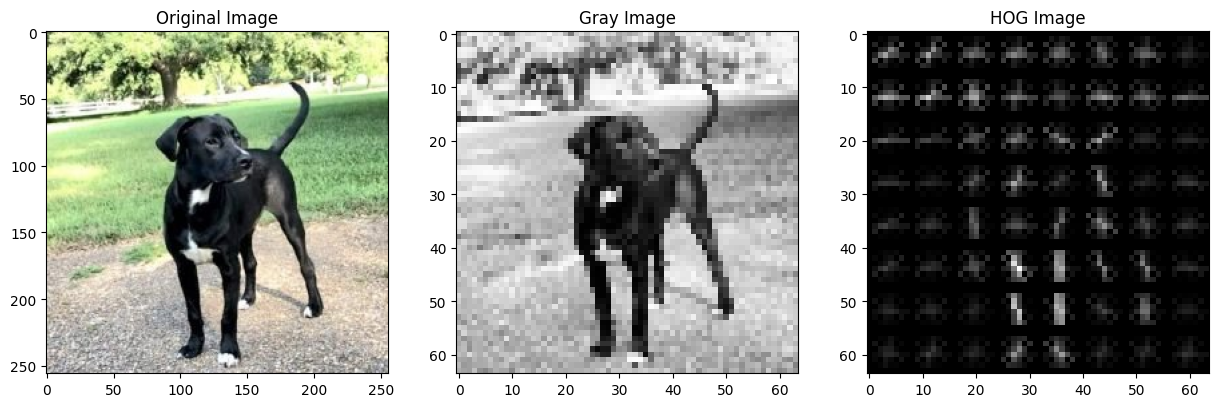

In [69]:
img_path = "/Users/hongthai/Downloads/animals/inf/dog.jpg"
image = cv2.imread(img_path)
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

image = cv2.imread(img_path)
image = np.array(image).astype('uint8')
image = cv2.resize(image, (64, 64))
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 3, 2)
plt.imshow(grey_image, cmap='gray')
plt.title('Gray Image')

sample_image_features, sample_hog_image = hog(grey_image,
                                              visualize=True,
                                              orientations=9,
                                              block_norm='L2',
                                              pixels_per_cell=(8, 8),
                                              cells_per_block=(2, 2))
plt.subplot(1, 3, 3)
plt.imshow(sample_hog_image, cmap=plt.cm.gray)
plt.title('HOG Image')

plt.show()
plt.show()

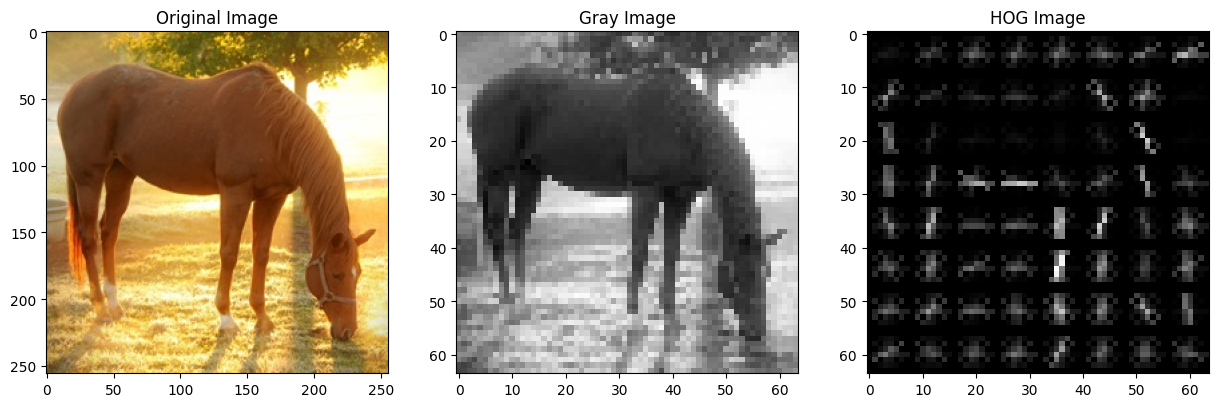

In [70]:
img_path = "/Users/hongthai/Downloads/animals/inf/horse.jpg"
image = cv2.imread(img_path)
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

image = cv2.imread(img_path)
image = np.array(image).astype('uint8')
image = cv2.resize(image, (64, 64))
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 3, 2)
plt.imshow(grey_image, cmap='gray')
plt.title('Gray Image')

sample_image_features, sample_hog_image = hog(grey_image,
                                              visualize=True,
                                              orientations=9,
                                              block_norm='L2',
                                              pixels_per_cell=(8, 8),
                                              cells_per_block=(2, 2))
plt.subplot(1, 3, 3)
plt.imshow(sample_hog_image, cmap=plt.cm.gray)
plt.title('HOG Image')

plt.show()

# HOG Feature Extraction

Feature extraction using HOG with orientations=36

In [71]:
def load_images(folder_path):
    features = []
    labels = []

    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        image = cv2.imread(img_path)
        if image is None:
            continue
        image = np.array(image).astype('uint8')
        image = cv2.resize(image, (64, 64))
        grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        hog_features = hog(grey_image, orientations=36, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")

        features.append(hog_features)
        labels.append( os.path.basename(folder_path))

    return features, labels


# Load Images and Generate Train/Val/Test

In [72]:
list_folders_train = os.listdir(train_dir)
list_folders_val = os.listdir(val_dir)

In [73]:
X_train_ = []
y_train_ = []
X_test_ = []
y_test_ = []

# Train
for folder_train in list_folders_train:
    folder_path_train = os.path.join(train_dir, folder_train)
    if not os.path.isdir(folder_path_train):
        continue  # Bỏ qua nếu không phải thư mục

    features, labels = load_images(folder_path_train)
    X_train_.extend(features)
    y_train_.extend(labels)

# Validation
for folder_val in list_folders_val:
    folder_path_val = os.path.join(val_dir, folder_val)
    if not os.path.isdir(folder_path_val):
        continue  # Bỏ qua nếu không phải thư mục

    features, labels = load_images(folder_path_val)
    X_test_.extend(features)
    y_test_.extend(labels)

In [74]:
X_train = np.array(X_train_)
y_train = np.array(y_train_)
X_test = np.array(X_test_)
y_test = np.array(y_test_)

In [75]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13474, 7056)
(13474,)
(1497, 7056)
(1497,)


In [76]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [77]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(9431, 7056)
(4043, 7056)
(1497, 7056)


In [78]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import joblib

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)
y_test_encoded = encoder.transform(y_test)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [79]:
print("Dimensions of X_train: ", X_train.shape)
print("Dimensions of y_train: ", y_train.shape)
print("Dimensions of X_val: ", X_val.shape)
print("Dimensions of y_val: ", y_val.shape)
print("Dimensions of X_test: ", X_test.shape)
print("Dimensions of y_test: ", y_test.shape)

Dimensions of X_train:  (9431, 7056)
Dimensions of y_train:  (9431,)
Dimensions of X_val:  (4043, 7056)
Dimensions of y_val:  (4043,)
Dimensions of X_test:  (1497, 7056)
Dimensions of y_test:  (1497,)


In [80]:
# Đếm số lượng mỗi nhãn trong tập train
unique_labels, label_counts = np.unique(y_train_encoded, return_counts=True)
for label, count in zip(unique_labels, label_counts):
    print(f"Nhãn {label}: {count}")


Nhãn 0: 1904
Nhãn 1: 1842
Nhãn 2: 1895
Nhãn 3: 1924
Nhãn 4: 1866


In [81]:
# Đếm số lượng mỗi nhãn trong tập val
unique_labels, label_counts = np.unique(y_val_encoded, return_counts=True)
for label, count in zip(unique_labels, label_counts):
    print(f"Nhãn {label}: {count}")


Nhãn 0: 833
Nhãn 1: 785
Nhãn 2: 835
Nhãn 3: 781
Nhãn 4: 809


In [82]:
# Đếm số lượng mỗi nhãn trong tập test
unique_labels, label_counts = np.unique(y_test_encoded, return_counts=True)
for label, count in zip(unique_labels, label_counts):
    print(f"Nhãn {label}: {count}")


Nhãn 0: 300
Nhãn 1: 300
Nhãn 2: 299
Nhãn 3: 300
Nhãn 4: 298


In [83]:
# PCA giảm chiều dữ liệu
from sklearn.decomposition import PCA

n_components = 50
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_val_pca = pca.transform(X_val_scaled)
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

In [84]:
scarler_loaded = joblib.load('scaler.pkl')
pca_loaded = joblib.load('pca.pkl')

In [85]:
print(X_train_pca.shape)
print(X_test_pca.shape)
print(X_val_pca.shape)

(9431, 50)
(1497, 50)
(4043, 50)


# SVM 

In [86]:
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score

def SVM(X_train, X_test, y_train, y_test, kernel='rbf', C=1):
    svm = SVC(kernel = kernel, C = C).fit(X_train, y_train)
    svm_predictions = svm.predict(X_test)
    print("Validation Set")
    print("accuracy_score: ", accuracy_score(y_test, svm_predictions))
    print("precision_score: ", precision_score(y_test, svm_predictions, average='weighted'))
    print("recall_score: ", recall_score(y_test, svm_predictions, average='weighted'))
    print("f1_score: ", f1_score(y_test, svm_predictions, average='weighted'))
    print(classification_report(y_test, svm_predictions))
    return svm

svm = SVM(X_train_pca, X_val_pca, y_train_encoded, y_val_encoded, kernel='rbf', C=1)

# Lưu mô hình
joblib.dump(svm, 'svm.joblib')

Validation Set
accuracy_score:  0.7682414048973535
precision_score:  0.7674474254523704
recall_score:  0.7682414048973535
f1_score:  0.7667136943484412
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       833
           1       0.90      0.92      0.91       785
           2       0.69      0.59      0.64       835
           3       0.65      0.72      0.68       781
           4       0.65      0.65      0.65       809

    accuracy                           0.77      4043
   macro avg       0.77      0.77      0.77      4043
weighted avg       0.77      0.77      0.77      4043



['svm.joblib']

In [87]:
y_pred_test = svm.predict(X_test_pca)
print("Test Set")
print("accuracy_score: ", accuracy_score(y_test_encoded, y_pred_test))
print("precision_score: ", precision_score(y_test_encoded, y_pred_test, average='weighted'))
print("recall_score: ", recall_score(y_test_encoded, y_pred_test, average='weighted'))
print("f1_score: ", f1_score(y_test_encoded, y_pred_test, average='weighted'))

Test Set
accuracy_score:  0.802939211756847
precision_score:  0.8018192163473588
recall_score:  0.802939211756847
f1_score:  0.8008967245665377


# KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(X_train, X_test, y_train, y_test, n_neighbors=6):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    knn_predictions=knn.predict(X_test)
    print(f"n_neighbors = {n_neighbors}")
    print("accuracy_score: ", accuracy_score(y_test, knn_predictions))
    print("precision_score: ", precision_score(y_test, knn_predictions, average='weighted'))
    print("recall_score: ", recall_score(y_test, knn_predictions, average='weighted'))
    print("f1_score: ", f1_score(y_test, knn_predictions, average='weighted'))
    print(classification_report(y_test, knn_predictions))
    return knn

import matplotlib.pyplot as plt

# # Danh sách để lưu accuracy
# train_accuracies = []
# val_accuracies = []
# neighbors_range = range(1, 30)

# best_accuracy = 0
# best_n_neighbors = 0

# for n_neighbors in neighbors_range:
#     knn = KNN(X_train_pca, X_val_pca, y_train, y_val, n_neighbors=n_neighbors)
    
#     acc_train = knn.score(X_train_pca, y_train)
#     acc_val = knn.score(X_val_pca, y_val)

#     train_accuracies.append(acc_train)
#     val_accuracies.append(acc_val)

#     if acc_val > best_accuracy:
#         best_accuracy = acc_val
#         best_n_neighbors = n_neighbors

# # In ra best result
# print("Best n_neighbors:", best_n_neighbors)
# print("Best accuracy:", best_accuracy)

# # Vẽ biểu đồ
# plt.figure(figsize=(10, 6))
# plt.plot(neighbors_range, val_accuracies, marker='s', linestyle='--', color='red', label='Validation Accuracy')
# plt.xlabel('Number of Neighbors (k)')
# plt.ylabel('Accuracy')
# plt.title('KNN Accuracy with Different n_neighbors')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


knn = KNN(X_train_pca, X_val_pca, y_train, y_val, n_neighbors=13)
joblib.dump(knn, 'knn.joblib')

n_neighbors = 13
accuracy_score:  0.7158050952263171
precision_score:  0.7144810696036237
recall_score:  0.7158050952263171
f1_score:  0.7087559285480927
              precision    recall  f1-score   support

         cat       0.89      0.98      0.93       833
         dog       0.86      0.89      0.87       785
    elephant       0.64      0.47      0.54       835
       horse       0.55      0.72      0.62       781
        lion       0.63      0.53      0.58       809

    accuracy                           0.72      4043
   macro avg       0.71      0.72      0.71      4043
weighted avg       0.71      0.72      0.71      4043



['knn.joblib']

In [89]:
y_pred_test = knn.predict(X_test_pca)
print("Test Set")
print("accuracy_score: ", accuracy_score(y_test, y_pred_test))
print("precision_score: ", precision_score(y_test, y_pred_test, average='weighted'))
print("recall_score: ", recall_score(y_test, y_pred_test, average='weighted'))
print("f1_score: ", f1_score(y_test, y_pred_test, average='weighted'))

Test Set
accuracy_score:  0.7321309285237141
precision_score:  0.7351120553251679
recall_score:  0.7321309285237141
f1_score:  0.724560811972779


# Random Forest 

In [90]:
from sklearn.ensemble import RandomForestClassifier

def RandomForest(X_train, X_test, y_train, y_test, n_estimators=100):
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=25).fit(X_train, y_train)
    rf_predictions = rf.predict(X_test)
    print("Validation Set")
    print("accuracy_score: ", accuracy_score(y_test, rf_predictions))
    print("precision_score: ", precision_score(y_test, rf_predictions, average='weighted'))
    print("recall_score: ", recall_score(y_test, rf_predictions, average='weighted'))
    print("f1_score: ", f1_score(y_test, rf_predictions, average='weighted'))
    return rf

rf = RandomForest(X_train_pca, X_val_pca, y_train, y_val, n_estimators=100)
joblib.dump(rf, 'rf.joblib')

Validation Set
accuracy_score:  0.7187731882265644
precision_score:  0.7147214714587237
recall_score:  0.7187731882265644
f1_score:  0.7160322886403492


['rf.joblib']

In [91]:
y_pred_test = rf.predict(X_test_pca)
print("Test Set")
print("Accuracy_score: ", accuracy_score(y_test, y_pred_test))
print("Precision_score: ", precision_score(y_test, y_pred_test, average='weighted'))
print("Recall_score: ", recall_score(y_test, y_pred_test, average='weighted'))
print("f1_score: ", f1_score(y_test, y_pred_test, average='weighted'))

Test Set
Accuracy_score:  0.7321309285237141
Precision_score:  0.7294300573212917
Recall_score:  0.7321309285237141
f1_score:  0.7291737016438996


# Demo


In [92]:
def extract_features(image_path):
    image = cv2.imread(image_path)
    image = np.array(image).astype('uint8')
    image = cv2.resize(image, (64, 64))
    grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hog_features = hog(grey_image, orientations=36, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
    hog_features = np.array(hog_features).reshape(1, -1)
    hog_features = scaler.transform(hog_features)
    hog_features = pca.transform(hog_features)
    return hog_features

[ WARN:0@1839.415] global loadsave.cpp:268 findDecoder imread_('/Users/hongthai/Downloads/CS231/Jaguar_(Panthera_onca_palustris)_male_Three_Brothers_River_(cropped).jpeg'): can't open/read file: check file path/integrity


error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


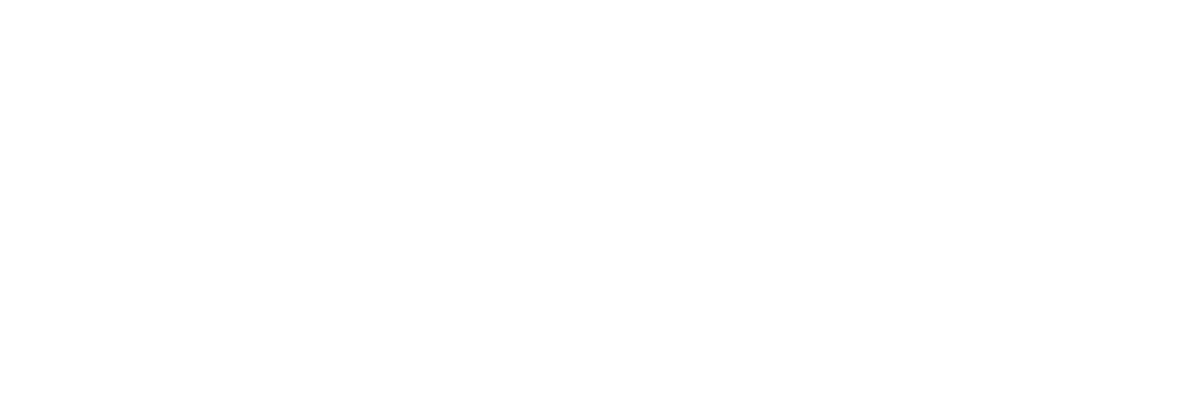

In [93]:
img_path = "/Users/hongthai/Downloads/CS231/Jaguar_(Panthera_onca_palustris)_male_Three_Brothers_River_(cropped).jpeg"
plt.figure(figsize=(15, 5))
plt.axis("off")
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.show()

hog_features = extract_features(img_path)

y_pred_svm = svm.predict(hog_features)
print("SVM - Predicted Label: ", encoder.inverse_transform(y_pred_svm)[0])

y_pred_knn = knn.predict(hog_features)
print("KNN - Predicted Label: ", y_pred_knn[0])

y_pred_rf = rf.predict(hog_features)
print("RF - Predicted Label: ", y_pred_rf[0])